400104867

Payam Taebi



# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [29]:
data = pd.read_csv('bank-full.csv', delimiter=';')
print(data.head())

# Initial data inspection
print(data.info())
print(data.describe())

# Handle categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('y', axis=1)  # Assuming 'y' is the target column
y = data['y']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


for batch in train_loader:
  print(batch[0].shape)
  print(batch[1].shape)
  break


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

#Model
define your model in here

In [30]:
import torch.nn.functional as F

class BankMarketingNet(nn.Module):
    def __init__(self, input_dim):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 2)  # Output layer for binary classification (0 or 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model with input dimension
input_dim = X_train.shape[1]
model = BankMarketingNet(input_dim)


#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

Epoch [1/50], Train Loss: 0.3048, Val Loss: 0.2476
Epoch [2/50], Train Loss: 0.2421, Val Loss: 0.2380
Epoch [3/50], Train Loss: 0.2352, Val Loss: 0.2346
Epoch [4/50], Train Loss: 0.2311, Val Loss: 0.2340
Epoch [5/50], Train Loss: 0.2296, Val Loss: 0.2318
Epoch [6/50], Train Loss: 0.2271, Val Loss: 0.2310
Epoch [7/50], Train Loss: 0.2250, Val Loss: 0.2302
Epoch [8/50], Train Loss: 0.2241, Val Loss: 0.2299
Epoch [9/50], Train Loss: 0.2224, Val Loss: 0.2318
Epoch [10/50], Train Loss: 0.2212, Val Loss: 0.2297
Epoch [11/50], Train Loss: 0.2191, Val Loss: 0.2276
Epoch [12/50], Train Loss: 0.2179, Val Loss: 0.2297
Epoch [13/50], Train Loss: 0.2163, Val Loss: 0.2277
Epoch [14/50], Train Loss: 0.2151, Val Loss: 0.2276
Epoch [15/50], Train Loss: 0.2141, Val Loss: 0.2261
Epoch [16/50], Train Loss: 0.2126, Val Loss: 0.2271
Epoch [17/50], Train Loss: 0.2116, Val Loss: 0.2297
Epoch [18/50], Train Loss: 0.2099, Val Loss: 0.2282
Epoch [19/50], Train Loss: 0.2090, Val Loss: 0.2287
Epoch [20/50], Train 

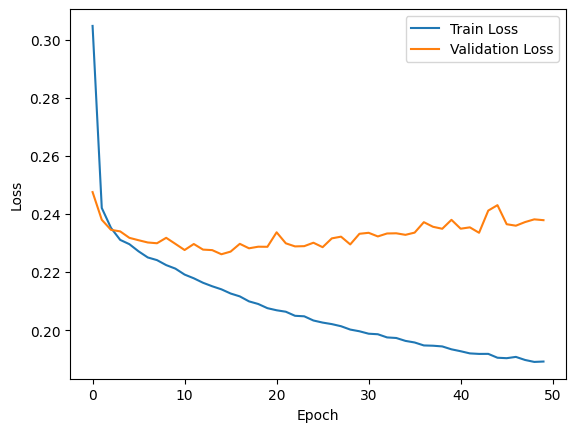

In [31]:
input_dim = X_train.shape[1]
model = BankMarketingNet(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
train_losses = []
val_losses = []
best_val_loss = float('inf')
best_model_path = 'best_model.pth'

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), best_model_path)

    # Print epoch details
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Save the losses for later usage
train_losses_array = np.array(train_losses)
val_losses_array = np.array(val_losses)

# Plot the training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [32]:
best_model = BankMarketingNet(input_dim)
best_model.load_state_dict(torch.load('best_model.pth'))
best_model.eval()

# Evaluation function
def evaluate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    average_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / total_predictions
    return average_loss, accuracy

# Evaluate the model on the test set
test_loss, test_accuracy = evaluate(best_model, test_loader, criterion)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.2266, Test Accuracy: 0.9010
